# HW03: Discrimination by Regression
## Hamza Dehidi KU 0077989
### November 5, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Parameters

In [2]:
np.random.seed(521)
# The below Parameters are givien.
# Mean parameters
class_means = np.array([[+0.0, +2.5],
                        [-2.5, -2.0],
                        [+2.5, -2.0]])
# Covariance parameters
class_covariances = np.array([[[+3.2, +0.0],
                               [+0.0, +1.2]],
                              [[+1.2, +0.8],
                               [+0.8, +1.2]],
                              [[+1.2, -0.8],
                               [-0.8, +1.2]]])
# Sample sizes
class_sizes = np.array([120, 80, 100])

## Data Generation

In [3]:
# Generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.concatenate((points1, points2, points3))

# Labeling the data 
y_truth= np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Plotting Data

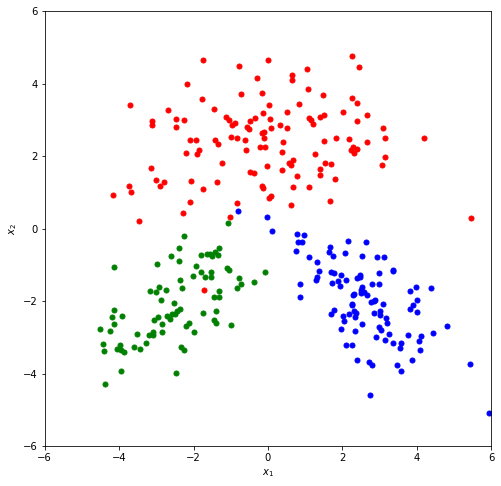

In [4]:
# Assuming we have no idea about the parameters exploring the data by ploting. 
# plot generated data points 
plt.figure(figsize = (8, 8))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10) #first dataset
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10) #Second dataset
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10) #Third dataset
plt.xlim((-6, +6))
plt.ylim((-6, +6))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

## Getting Data Size, Sample numbers & Dimentions

In [5]:
# Getting number of classes(K), number of samples(N) & number of dimentions (D)
# get number of classes and number of samples
K = np.max(y_truth)
N = X.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth - 1] = 1

## Sigmoid Functions

$\textrm{sigmoid}(\boldsymbol{w}_{c}^{\top} \boldsymbol{x} + w_{c0}) = \dfrac{1}{1 + \exp\left[-(\boldsymbol{w}_{c}^{\top} \boldsymbol{x} + w_{c0})\right]}$

In [6]:
# define the sigmoid function
def sigmoid(X, W, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, W) + w0))))


## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}_{c}} &= \sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})\widehat{y}_{ic}(1-\widehat{y}_{ic})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{c0}} &= \sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})\widehat{y}_{ic}(1-\widehat{y}_{ic})
\end{align*}

In [7]:
# define the gradient functions
def gradient_W(X, Y_truth, Y_predicted):
    return(np.asarray([np.matmul(((Y_truth[:,c] - Y_predicted[:,c])*Y_predicted[:,c])*(1-Y_predicted[:,c]), X)
                       for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(np.sum((Y_truth - Y_predicted)*(Y_predicted)*(1 - Y_predicted), axis = 0))

## Algorithm Parameters

In [8]:
# set learning parameters
eta = 0.01
epsilon = 0.001

## Parameter Initialization

In [9]:
# randomly initalize w and w0
np.random.seed(521)
W = np.random.uniform(low = -0.01, high = 0.01, size = (X.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm

$\textrm{Error} = 0.5\sum\limits_{i = 1}^{N} \sum\limits_{c = 1}^{K} \left[ (y_{ic} - \hat{y}_{ic})^2 \right]$

In [10]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    Y_predicted = sigmoid(X, W, w0)
     
    objective_values = np.append(objective_values, 0.5 * np.sum((Y_truth - Y_predicted)**2))

    W_old = W
    w0_old = w0

    W = W + eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0 + eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1
print(W)
print(w0)


[[ 0.02528117 -2.23729296  2.44057308]
 [ 4.6079024  -2.46097432 -2.26881566]]
[[-1.13651535 -4.28418421 -3.60810854]]


## Convergence

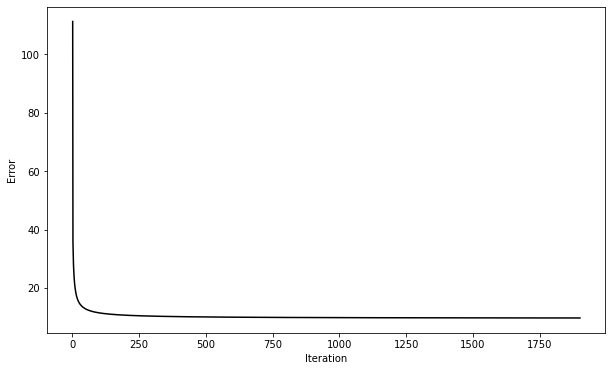

In [11]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration +1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Performance

In [12]:
# calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, y_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        117   1   3
2          2  78   0
3          1   1  97


## Visualization

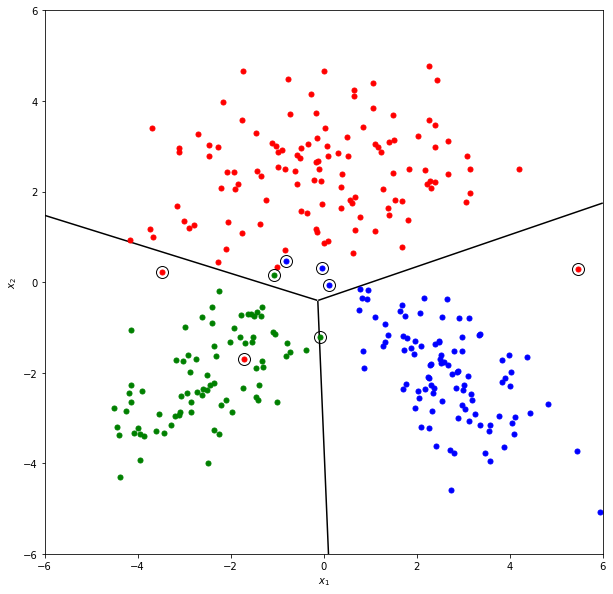

In [13]:
# evaluate discriminant function on a grid
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = W[0, c] * x1_grid + W[1, c] * x2_grid + w0[0, c]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(X[y_truth == 1, 0], X[y_truth == 1, 1], "r.", markersize = 10)
plt.plot(X[y_truth == 2, 0], X[y_truth == 2, 1], "g.", markersize = 10)
plt.plot(X[y_truth == 3, 0], X[y_truth == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y_truth, 0], X[y_predicted != y_truth, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()